In [ ]:
!pip install yfinance
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 11.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

In [ ]:
from google.colab import files
uploaded = files.upload();
import io
df = pd.read_csv(io.BytesIO(uploaded['merged_all_data.csv']))

Saving merged_all_data.csv to merged_all_data.csv


In [ ]:
df

,Date,SPY,RUT,DJI,STI,N225,IXIC,HSI,NSEI,STOXX50E,MID,NDX,NYA,OEX,RUA,RUI,SML,SP1500,SPX
0,2013/2/7,125.377762,908.099976,13944.04980,2632.795352,121.550496,3165.129883,2989.230676,111.730285,3513.408822,1102.62,2746.50,8893.75,679.68,898.64,838.20,509.19,349.74,1509.39
1,2013/2/8,126.075455,913.669983,13992.96973,2638.594118,119.115694,3193.870117,2993.573155,110.930515,3521.811253,1109.09,2775.56,8935.24,683.04,903.90,843.08,512.24,351.73,1517.93
2,2013/2/14,126.482369,923.760010,13973.38965,2663.205200,121.249900,3198.659912,3018.766395,109.572078,3543.089746,1117.12,2771.43,8953.07,684.94,906.61,845.05,517.23,352.77,1521.38
3,2013/2/15,126.332855,923.150024,13981.75977,2657.925795,120.204288,3192.030029,3023.583022,109.191735,3492.135162,1115.75,2764.67,8933.22,683.97,905.77,844.24,516.43,352.39,1519.79
4,2013/2/19,127.279663,932.000000,14035.66992,2660.217551,121.434487,3213.590088,2984.654941,109.633062,3553.522422,1123.74,2782.86,9004.38,689.26,912.36,850.22,521.94,355.01,1530.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,2023/1/13,398.500000,1887.030029,34302.60938,2490.604796,202.207290,11079.160160,2784.063048,221.370482,4507.867950,2580.91,11541.48,15918.37,1776.57,2317.66,2197.86,1238.88,916.96,3999.09
2057,2023/1/17,397.769989,1884.290039,33910.85156,2485.253610,203.697601,11095.110350,2762.673521,221.098901,4520.853614,2575.61,11557.19,15883.56,1773.23,2314.02,2194.39,1234.50,915.06,3990.97
2058,2023/1/18,391.489990,1854.359985,33296.96094,2492.272111,208.847124,10957.009770,2772.775160,222.818016,4505.493516,2543.36,11410.29,15649.13,1744.77,2278.39,2160.68,1215.10,900.98,3928.86
2059,2023/1/19,388.640015,1836.349976,33044.55859,2481.728925,205.425825,10852.269530,2767.450158,222.356823,4420.943409,2516.89,11295.67,15569.63,1732.87,2259.69,2143.16,1204.70,893.93,3898.85


In [ ]:
def pair_trading_process(prices1, prices2, date, k):
  df = pd.DataFrame()
  df['Date'] = date
  df['x'] = prices1
  df['y'] = prices2
  
  df['x_n'] = (df['x'] - df['x'].min())/(df['x'].max() - df['x'].min())
  df['y_n'] = (df['y'] - df['y'].min())/(df['y'].max() - df['y'].min())

  df['Diff'] = df['x_n'] - df['y_n']
  SD = df['Diff'].std()
  threshold = k * SD

  conditions = [
    (df['Diff'] > threshold),
    (df['Diff'] < - threshold),
    (df['Diff'] < threshold) & (df['Diff'] > - threshold)
    ]
  values = [ -1, 1, 0]
  df['Signal'] = np.select(conditions, values)
  return df

In [ ]:
def get_return_verified(prices1, prices2, signals,shares = 1):
    ret_list = np.zeros(len(signals))

    ratio = (prices2[0]/prices1[0])
    for i in range(1, len(signals)):
        if(signals[i] - signals[i-1] != 0):#If position change != 0, change ratio;otherwise keep it
            ratio = (prices2[0]/prices1[0])
        ret_list[i] = (ret_list[i-1] + (prices1[i] - prices1[i-1])*shares*signals[i-1]*ratio - (prices2[i] - prices2[i-1])*shares*signals[i-1])
    return ret_list

<AxesSubplot:xlabel='Date', ylabel='Signal'>

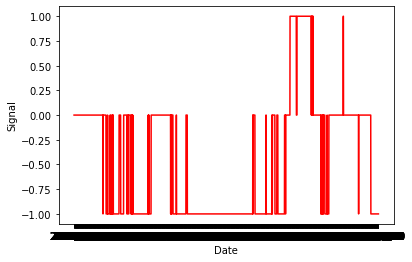

In [ ]:
df_mn = pair_trading_process(df['MID'], df['NDX'], df['Date'], 1)
sns.lineplot(data = df_mn, y = 'Signal',x = 'Date',color = 'red')

<AxesSubplot:xlabel='Date', ylabel='y'>

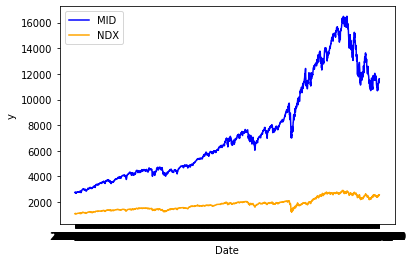

In [ ]:
sns.lineplot(data = df_mn, y = 'y',x = 'Date',color = 'blue', label = "MID")
sns.lineplot(data = df_mn, y = 'x',x = 'Date',color = 'orange', label = "NDX")

In [ ]:
df_mn

,Date,x,y,x_n,y_n,Diff,Signal
0,2013/2/7,1102.62,2746.50,0.011449,0.003302,0.008147,0
1,2013/2/8,1109.09,2775.56,0.014986,0.005409,0.009577,0
2,2013/2/14,1117.12,2771.43,0.019376,0.005109,0.014267,0
3,2013/2/15,1115.75,2764.67,0.018627,0.004619,0.014008,0
4,2013/2/19,1123.74,2782.86,0.022996,0.005938,0.017058,0
...,...,...,...,...,...,...,...
2056,2023/1/13,2580.91,11541.48,0.819690,0.641079,0.178611,-1
2057,2023/1/17,2575.61,11557.19,0.816793,0.642219,0.174574,-1
2058,2023/1/18,2543.36,11410.29,0.799160,0.631566,0.167594,-1
2059,2023/1/19,2516.89,11295.67,0.784688,0.623254,0.161434,-1


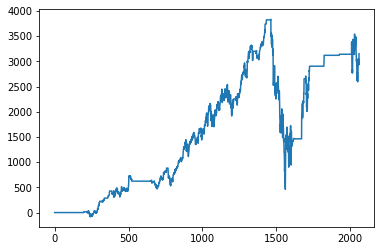

In [ ]:
ret_list_mn = get_return_verified(df_mn['x'], df_mn['y'],df_mn['Signal'],shares = 1)
plt.plot(ret_list_mn)

[Text(0.5, 1.0, 'Long/Short Signal for RUT and ^N225')]

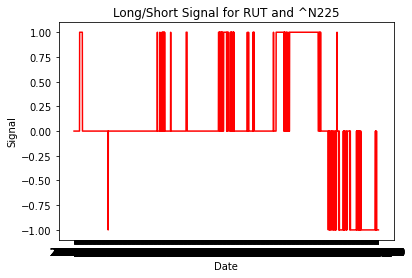

In [ ]:
df_rn = pair_trading_process(df['RUT'], df['N225'], df['Date'], 1)
sns.lineplot(data = df_rn, y = 'Signal',x = 'Date',color = 'red').set(title='Long/Short Signal for RUT and ^N225')

[Text(0.5, 1.0, 'Stock Trend over the years')]

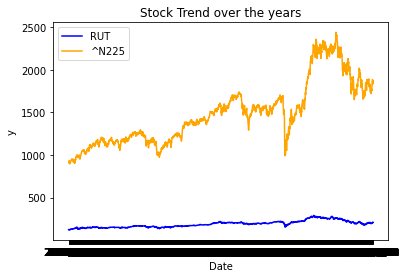

In [ ]:
sns.lineplot(data = df_rn, y = 'y',x = 'Date',color = 'blue', label = "RUT").set(title = "Stock Trend over the years")
sns.lineplot(data = df_rn, y = 'x',x = 'Date',color = 'orange', label = "^N225").set(title = "Stock Trend over the years")

Text(0.5, 1.0, 'Return over the years')

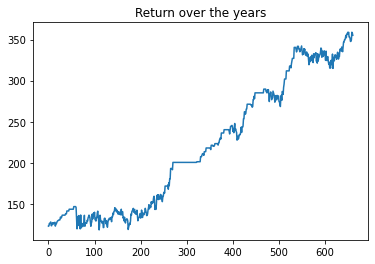

In [ ]:
ret_list_rn = get_return_verified(df_rn['x'], df_rn['y'],df_rn['Signal'],shares = 1)
plt.plot(ret_list_rn[1400:])
plt.title("Return over the years")